# 추천시스템의 유형
- 추천시스템은 크게 __컨텐츠 기반 필터링(Content based filtering) 방식__과 __협업 필터링(Collaborative Filtering)__방식으로 나뉜다.

    
요즘에는 개인화 특성을 좀 더 강화하기 위해서 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합해 사용하는 경우도 늘고 있습니다. 

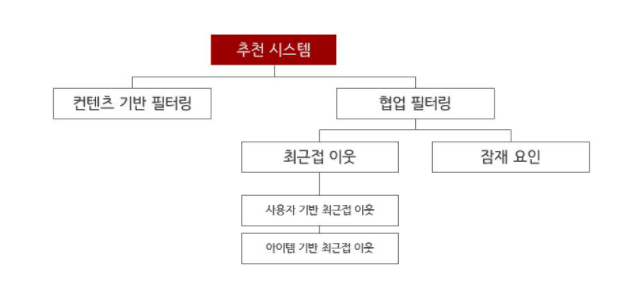

# 1. 컨텐츠 기반 필터링 추천시스템
- 콘텐츠 기반 필터링 방식은 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식이다. 예를 들어 사용자가 특정 영화에 높은 평점을 줬따면 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천해주는 방식입니다.
- 영화추천에 있어서는, 사용자가 선호하는 감독, 장르, 키워드 등의 콘텐츠를 다양하게 포함하고 있으므로 효율적
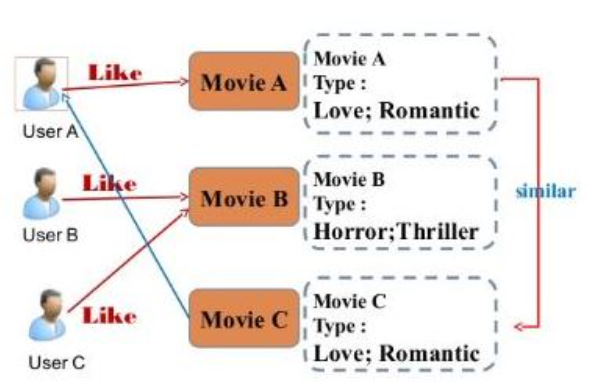
상당히 단순한 방식으로, Rule-base 와도 유사한듯

# 2. 협업 필터링

## 2.1. 최근접 이웃 협업 필터링

- 쉽게 예시를 들면, 신작 영화가 개봉했을 때, 단순히 좋아하는 배우/감독의 영화라는 이유만으로 보는것 이아닌 가까운 친구나 지인들에게 영화가 어땠는지, 취향이 비슷한 사람들로부터 의견을 들어보는것
- 친구들에게 물어보는 것과 유사한 방식으로, 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것이 협업 필터링(Collaborative-Filter) 방식입니다. <br>

__즉, 사용자가 남긴 평점(rating)데이터를 기반하여, 남기지 않은 데이터를 추론하는 방식이다.__
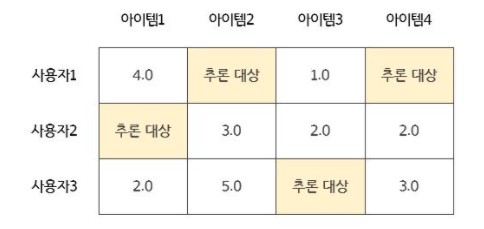
협업 필터링의 주요 목표
- __사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로, 사용자가 아직 평가하지 않은 아이템을 예측 평가__
- 협업 필터링 기반의 추천 시스템은 __최근접 이웃 방식__과 __잠재 요인 방식__으로 나뉘며, 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천을 수행합니다.협업 필터링 알고리즘에 사용되는 사용자-아이템 평점 행렬에서 행(Row)는 개별 사용자, 열(Column)은 개별 아이템으로 구성되며, 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값이 평점을 나타내는 형태가 돼야 합니다.

- 만약 데이터가 다음 그림의 왼쪽과 같이 레코드 레벨 형태인 사용자-아이템 평점 데이터라면, 판다스의 __pivot_table()__과 같은 함수를 이용해 그림의 오른쪽과 같은 형태인 사용자-아이템 형태로 변경해야 한다.

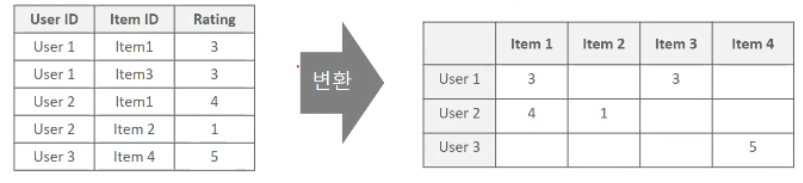

> 위와 같이, 이러한 사용자-아이템 행렬은 많은 아이템을 열로 가지는 다차원 행렬이며, 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 __희소 행렬(Sparse Matrix)__ 특성을 가지고 있습니다. 

최근접 이웃 필터링은 메모리(Memory) 협업 필터링이라고도 하며, 일반적으로 사용자 기반과 아이템 기반으로 다시 나뉠 수 있습니다.

- __사용자 기반(User-User) :__  당신과 비슷한 고객들이 다음 상품도 구매했습니다.
    - 사용자 기반 : *사용자(행) X 아이템(열)*
    - 아이템 기반 : *아이템(행) X 사용자(열)*
- __아이템 기반(Item-Item) :__ 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다. 

사용자 기반 최근접 이웃 방식은 __특정 사용자와 유사한 다른 사용자를 TOP-N 으로 선정해 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식__입니다. 즉, 특정 사용자와 타 사용자 간의 유사도(Similarity)를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자를 추출해 그들이 선호하는 아이템을 추천하는 것입니다. 

## 2.2 잠재 요인 협업 필터링

